In [42]:
%matplotlib inline

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from dnn_utils_v2 import load_planar_dataset

In [172]:
X, Y = load_planar_dataset()

In [39]:
stacked = np.vstack((X,Y))

In [43]:
color = stacked[2:,]
rgb = plt.get_cmap('jet')(color)

In [12]:
tips = sns.load_dataset('tips')

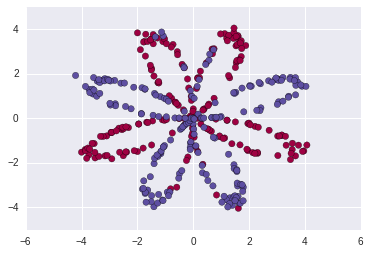

In [51]:
plt.scatter(x = stacked[0,], y = stacked[1,], c=Y, s=40, cmap=plt.cm.Spectral)

In [73]:
sess = tf.InteractiveSession()

In [93]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [203]:
x = tf.placeholder(tf.float32, shape=[None, 2])
y_ = tf.placeholder(tf.float32, shape=[None, 2])

In [204]:
W = tf.Variable(tf.zeros([2,2]))
b = tf.Variable(tf.zeros([2]))

In [205]:
sess.run(tf.global_variables_initializer())

In [206]:
y = tf.matmul(x,W) + b

In [207]:
y.shape

TensorShape([Dimension(None), Dimension(2)])

In [208]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [209]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [210]:
train_step.run(feed_dict={x: X.T, y_: Y.T})    

ValueError: Cannot feed value of shape (400, 1) for Tensor u'Placeholder_23:0', which has shape '(?, 2)'

In [144]:
batch = mnist.train.next_batch(100)

In [147]:
batch[0].shape

(100, 784)

In [182]:
batch[1].shape

(100, 10)

In [185]:
X.T.shape

(400, 2)

In [186]:
Y.T.shape

(400, 1)